# Pristine GRAPE calculation of control fields for cnot implementation

Robert Johansson (robert@riken.jp)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np

In [8]:
from qutip import *
from qutip.control import *

In [9]:
T = 2 * np.pi 
times = np.linspace(0, T, 500)

"""
    Class for representing the result of a GRAPE simulation.

    Attributes
    ----------
    u : array
        GRAPE control pulse matrix.

    H_t : time-dependent Hamiltonian
        The time-dependent Hamiltonian that realize the GRAPE pulse sequence.

    U_f : Qobj
        The final unitary transformation that is realized by the evolution
        of the system with the GRAPE generated pulse sequences.
    
    """

In [10]:
U = cnot()
R = 500
H_ops = [tensor(sigmax(), identity(2)),
         tensor(sigmay(), identity(2)),
         tensor(sigmaz(), identity(2)),
         tensor(identity(2), sigmax()),
         tensor(identity(2), sigmay()),
         tensor(identity(2), sigmaz()),
         tensor(sigmax(), sigmax()) +
         tensor(sigmay(), sigmay()) +
         tensor(sigmaz(), sigmaz())]

H_labels = [r'$u_{1x}$', r'$u_{1y}$', r'$u_{1z}$',
            r'$u_{2x}$', r'$u_{1y}$', r'$u_{2z}$',
            r'$u_{xx}$',
            r'$u_{yy}$',
            r'$u_{zz}$',
        ]

$U = CNOT $   
$H_{ops} = [\sigma_{x} \otimes Q, \sigma_{y} \otimes Q,  \sigma_{z} \otimes Q, Q \otimes \sigma_{x}, Q \otimes \sigma_{y}, Q \otimes \sigma_{z}, \sigma_{x} \otimes \sigma_{x}, \sigma_{y} \otimes \sigma_{y}, \sigma_{z} \otimes \sigma_{z}, ] $


In [11]:
H0 = 1 * np.pi * (tensor(sigmax(), identity(2)) + tensor(identity(2), sigmax()))

c_ops = []

# This is the analytical result in the absense of single-qubit tunnelling
#g = pi/(4 * T)
#H = g * (tensor(sigmax(), sigmax()) + tensor(sigmay(), sigmay()))

In [12]:
H0

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.         3.14159265 3.14159265 0.        ]
 [3.14159265 0.         0.         3.14159265]
 [3.14159265 0.         0.         3.14159265]
 [0.         3.14159265 3.14159265 0.        ]]

# GRAPE

In [13]:
from qutip.control.grape import plot_grape_control_fields, _overlap, grape_unitary_adaptive, cy_grape_unitary

In [14]:
from scipy.interpolate import interp1d
from qutip.ui.progressbar import TextProgressBar

In [15]:
u0 = np.array([np.random.rand(len(times)) * 2 * np.pi * 0.05 for _ in range(len(H_ops))])

u0 = [np.convolve(np.ones(10)/10, u0[idx,:], mode='same') for idx in range(len(H_ops))]

u_limits = None #[0, 1 * 2 * pi]
alpha = None

In [16]:
result = cy_grape_unitary(U, H0, H_ops, R, times, u_start=u0, u_limits=u_limits,
                          eps=2*np.pi*1, alpha=alpha, phase_sensitive=False,
                          progress_bar=TextProgressBar())

10.0%. Run time:  97.67s. Est. time left: 00:00:14:39
20.0%. Run time: 191.77s. Est. time left: 00:00:12:47
30.0%. Run time: 286.64s. Est. time left: 00:00:11:08
40.0%. Run time: 378.74s. Est. time left: 00:00:09:28
50.0%. Run time: 675.71s. Est. time left: 00:00:11:15
60.0%. Run time: 8687.33s. Est. time left: 00:01:36:31
70.0%. Run time: 24996.43s. Est. time left: 00:02:58:32
80.0%. Run time: 26187.74s. Est. time left: 00:01:49:06
90.0%. Run time: 29545.48s. Est. time left: 00:00:54:42
Total run time: 29635.21s


## Plot control fields for cnot gate in the presense of single-qubit tunnelling

plot_grape_control_fields(times, u, labels, uniform_axes=False):
    """
    Plot a series of plots showing the GRAPE control fields given in the
    given control pulse matrix u.

    Parameters
    ----------
    times : array
        Time coordinate array.

    u : array
        Control pulse matrix.

    labels : list
        List of labels for each control pulse sequence in the control pulse
        matrix.

    uniform_axes : bool
        Whether or not to plot all pulse sequences using the same y-axis scale.
    
    """

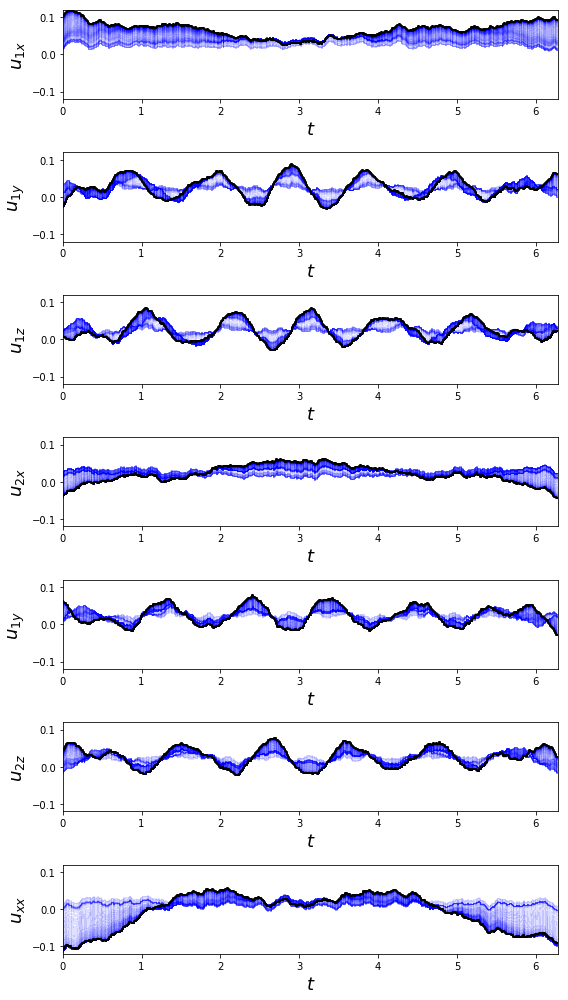

In [17]:
plot_grape_control_fields(times,
                          result.u / (2 * np.pi), H_labels, uniform_axes=True);

## Fidelity/overlap

In [18]:
U

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

In [19]:
result.U_f

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 7.07106781e-01+7.07106781e-01j -5.45868689e-16-1.65876156e-16j
  -3.87060176e-16-5.08707659e-16j -1.11312327e-15+1.90972048e-15j]
 [ 1.13325554e-15-1.53241813e-15j  7.07106781e-01+7.07106781e-01j
  -1.48492330e-15+1.42247325e-15j -1.47169603e-15+1.22558214e-15j]
 [ 1.23649192e-15-6.63084496e-16j -1.68051337e-16-8.28330460e-17j
   1.40859546e-15-1.47798440e-15j  7.07106781e-01+7.07106781e-01j]
 [-8.55869195e-16-6.31005664e-17j  1.49186219e-15+4.33680869e-16j
   7.07106781e-01+7.07106781e-01j -4.85722573e-16+1.35308431e-16j]]

In [20]:
result.U_f/result.U_f[0,0]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

In [21]:
_overlap(U, result.U_f).real, abs(_overlap(U, result.U_f)) ** 2

(0.7071067811865468, 0.9999999999999978)

## Test numerical integration of GRAPE pulse

In [22]:
U_f_numerical = propagator(
    result.H_t, times[-1], [], options=Odeoptions(nsteps=5000), args={})
U_f_numerical

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.47491979-0.24495636j  0.51577426-0.26477671j  0.29084637-0.28140672j
  -0.36600347+0.28386662j]
 [ 0.52721702-0.10246603j -0.02228741-0.46055232j -0.0907914 +0.52509781j
   0.31389292-0.34122978j]
 [ 0.29160287-0.31241913j  0.07288957+0.45081942j  0.078118  -0.45523025j
   0.56989244-0.26588931j]
 [-0.4339132 +0.23467402j  0.31529688-0.37855234j  0.5754488 -0.08814497j
   0.36596903-0.20269885j]]

In [23]:
U_f_numerical / U_f_numerical[0,0]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 1.        +0.j          1.08495014+0.00208189j  0.72512452-0.21852713j
  -0.85223309+0.15814608j]
 [ 0.96474579+0.28184674j  0.35800954-0.78509175j -0.60144712+0.79543856j
   0.81477287-0.29825244j]
 [ 0.75298618-0.26945683j -0.26550076+0.81231259j  0.52043448-0.6901092j
   1.17591184+0.04665582j]
 [-0.92297889+0.01807562j  0.84912441-0.35912152j  1.03267796+0.34703979j
   0.7825474 -0.02318051j]]

In [24]:
_overlap(result.U_f, U_f_numerical).real, abs(_overlap(result.U_f, U_f_numerical))**2

(0.09518199154214922, 0.22975943642138108)

# Process tomography

## Ideal cnot gate

In [25]:
op_basis = [[qeye(2), sigmax(), sigmay(), sigmaz()]] * 2
op_label = [["i", "x", "y", "z"]] * 2

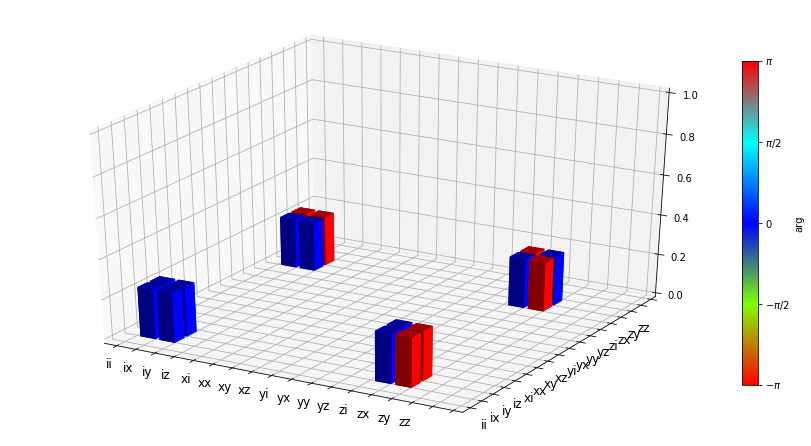

In [26]:
fig = plt.figure(figsize=(12,6))

U_i_s = to_super(U)

chi = qpt(U_i_s, op_basis)

fig = qpt_plot_combined(chi, op_label, fig=fig, threshold=0.001)

## cnot gate calculated using GRAPE

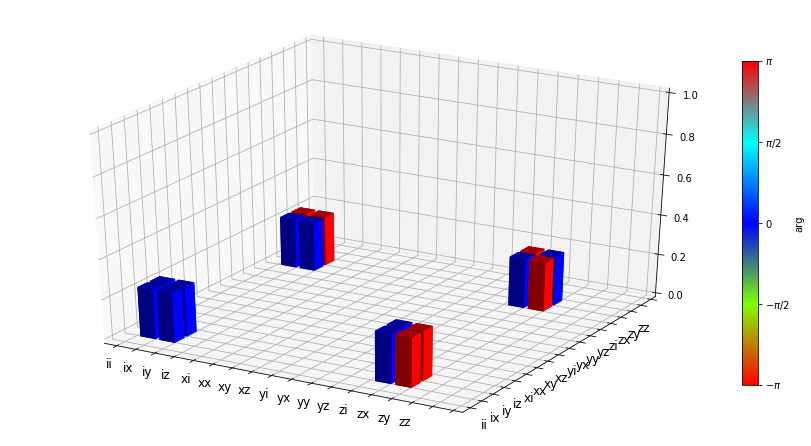

In [27]:
fig = plt.figure(figsize=(12,6))

U_f_s = to_super(result.U_f)

chi = qpt(U_f_s, op_basis)

fig = qpt_plot_combined(chi, op_label, fig=fig, threshold=0.001)

## Versions

In [28]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.2.0
Numpy,1.14.3
SciPy,1.1.0
matplotlib,3.0.2
Cython,0.28.1
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.3.1
Python,"3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]"
OS,posix [darwin]
